In [1]:
#This program generates the FIG.4C
#Power spectrum of excitatory mean firing rates across all
#layers, showing oscillatory activity.
#The peak is at 26 Hz. 

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
from matplotlib.lines import Line2D

In [12]:
#Importing some info I need
runtime=np.loadtxt("general_files/runtime.txt")*1000 #Runtime of the simulations

#Number of neurons for each type in each of the 4 layers
N= (np.loadtxt("general_files/N.txt").reshape(4, 4)).astype(int)
Ntot=5000
#In layer 1: 
N1=int(0.0192574218*Ntot)
#print(N1)

print("The corticular column in this model is composed by layer 2/3,4,5,6 and layer 1")
print("Total number of neurons in the column: %s + %s \n85 perc excitatory and 15 perc inhibitory \nIn each layer: 1 excitotory population and 3 inhibitory populations: pv, sst and vip cells.   "%(Ntot,N1))
print("Number of neurons for each type in each of the 4 layers:")
print(N)
print("The order is from left to right: E, PV, SST, VIP. From top to bottom: 2/3,4,5,6")

The corticular column in this model is composed by layer 2/3,4,5,6 and layer 1
Total number of neurons in the column: 5000 + 96 
85 perc excitatory and 15 perc inhibitory 
In each layer: 1 excitotory population and 3 inhibitory populations: pv, sst and vip cells.   
Number of neurons for each type in each of the 4 layers:
[[1236   65   47  107]
 [1010   98   53   27]
 [ 741   63   56   11]
 [1263  102  102   19]]
The order is from left to right: E, PV, SST, VIP. From top to bottom: 2/3,4,5,6


In [13]:
a='simulations_data/Cont/Spikes_files_30pA' #Folder where the spikes files 

In [14]:
#Function for computation of the firing rates from spikes 
def rates(data,iniz,fin,window,step_size):
    spikes=0
    time=iniz*1000 #Initial time you want to start computing the rates from (of the total lenght of the simulation time)
    all_time=fin*1000 #Final time you want to finish to compute the rates
    rates=[]
    sort_data=np.sort(data)

    while time <= all_time-window:
        for i in range(0,len(data)):
                if time <sort_data[i]< time+window:
                    spikes+=1
                elif sort_data[i]>= time+window:
                    break
        rates.append(spikes/window)
        time+=step_size
        spikes=0
    return rates  

In [15]:
#Function to compute the power spectrum
def power_spectrum(LFP,sec):
    data = LFP
    print(len(data))
    #le ampiezze non sono relative alle freq in hertz ma al numero di oscillazionin complete nel mio intervallo
    #il primo numero dell'array e' l'ampiezza della frequenza che ci sta una volta (onda che fa 1 giro nell'intervallo), 
    #il secondo numero e' l'ampiezza della frequenza che ci sta due volte (l'onda fa il giro completo 2 volte)
    fourier_transform = np.fft.rfft(data)
    abs_fourier_transform = np.abs(fourier_transform)
    power_spectrum = np.square(abs_fourier_transform)
    #print(fourier_transform[0:100])
    #print(len(fourier_transform)) #Circa meta' della lunghezza della mia time series da analizzare
    #print(power_spectrum)
    # x divided by the time in s of my simulation to obtain Hz (sec is given to the function)
    frequency=[x/sec for x in range(0,len(power_spectrum))]

    return frequency, power_spectrum

In [16]:
#To compute the rates of all excitatory in all the layers
# iniz=55 #Starting time 
# fin=58 #Final time 
# window=0.1 #Sliding window
# step=0.1 #step of the sliiding window
# rates_e23_s=rates(S_e23t,iniz,fin,window,step)
# rates_e4_s=rates(S_e4t,iniz,fin,window,step)
# rates_e5_s=rates(S_e5t,iniz,fin,window,step)
# rates_e6_s=rates(S_e6t,iniz,fin,window,step)

In [17]:
# #I save the rates in a folder, in the correct one
# save_folder='rate_01_01_3sec'
# np.save('simulations_data/RATE_FILE_SAVED/oscill_30pA/'+save_folder+'/r_e23', rates_e23_s)
# np.save('simulations_data/RATE_FILE_SAVED/oscill_30pA/'+save_folder+'/r_e4', rates_e4_s)
# np.save('simulations_data/RATE_FILE_SAVED/oscill_30pA/'+save_folder+'/r_e5', rates_e5_s)
# np.save('simulations_data/RATE_FILE_SAVED/oscill_30pA/'+save_folder+'/r_e6', rates_e6_s)

In [18]:
#TO UPLOAD THE COMPUTED RATES
#Folder containing the info I previously computed  
saved_folder='rate_01_01_3sec'
#saved_folder='rate_1_1'
#saved_folder='rate_1_1_3sec'

In [19]:
#I UPLOAD THE SAVED FOLDERS
r_e23=np.load('simulations_data/RATE_FILE_SAVED/oscill_30pA/'+saved_folder+'/r_e23.npy')
r_e4=np.load('simulations_data/RATE_FILE_SAVED/oscill_30pA/'+saved_folder+'/r_e4.npy')
r_e5=np.load('simulations_data/RATE_FILE_SAVED/oscill_30pA/'+saved_folder+'/r_e5.npy')
r_e6=np.load('simulations_data/RATE_FILE_SAVED/oscill_30pA/'+saved_folder+'/r_e6.npy')

In [20]:
#I compute the power spectrum 
sec=3 #seconds of simulations I am analyzing
freq23,power_sp23=power_spectrum(r_e23,sec)
freq4,power_sp4=power_spectrum(r_e4,sec)
freq5,power_sp5=power_spectrum(r_e5,sec)
freq6,power_sp6=power_spectrum(r_e6,sec)

30000
30000
30000
30000


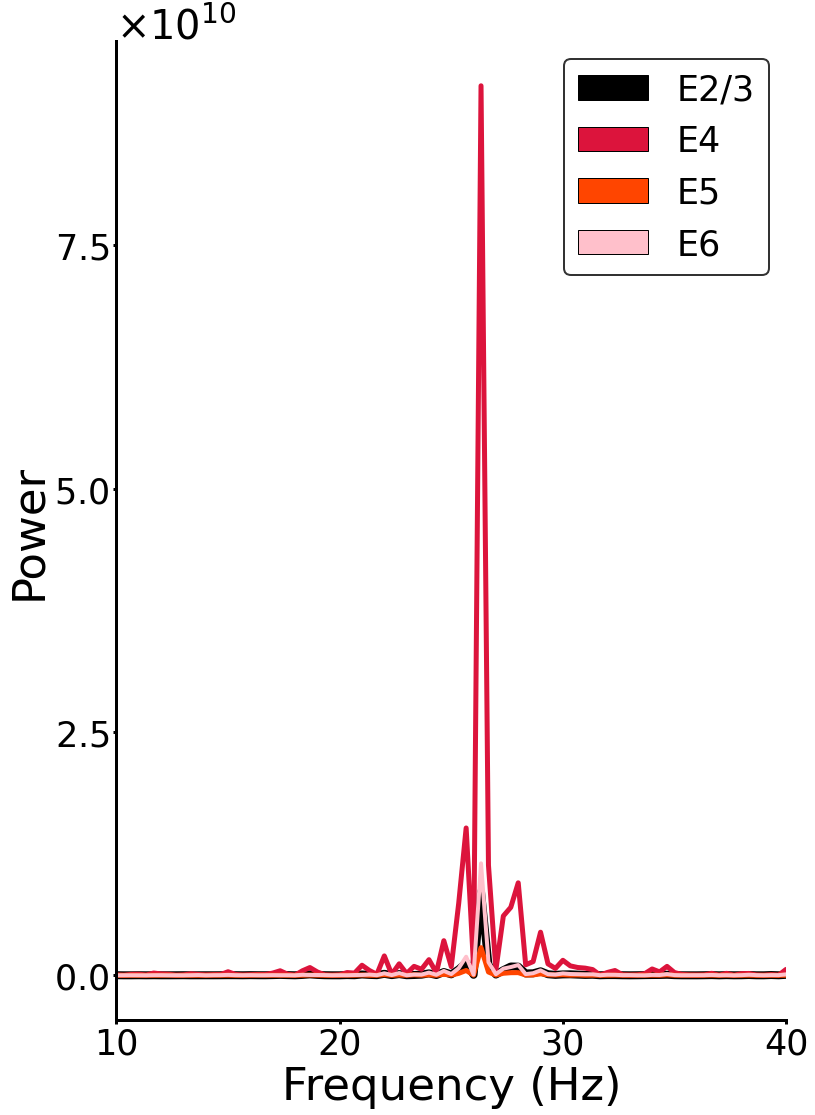

In [21]:
#Create figure
fig, ax = plt.subplots(figsize=(12,18))
plt.plot(freq23[1:], power_sp23[1:],linewidth=8,label='E2/3',color='black')
plt.plot(freq4[1:], power_sp4[1:],linewidth=5,label='E4',color='crimson')
plt.plot(freq5[1:], power_sp5[1:],linewidth=5,label='E5',color='orangered')
plt.plot(freq6[1:], power_sp6[1:],linewidth=4,label='E6',color='pink')

#Layout
plt.setp(ax.spines.values(), linewidth=3)
plt.gca().spines['right'].set_color('none')
plt.gca().spines['top'].set_color('none')

plt.locator_params(axis='x', nbins=5)
plt.locator_params(axis='y', nbins=5)
plt.xticks(size=35)
plt.yticks(size=35)
ax.xaxis.set_tick_params(width=3)
ax.yaxis.set_tick_params(width=3)
plt.xlim(10,40)
plt.xlabel('Frequency (Hz)',fontsize=45)
plt.ylabel('Power',fontsize=45)

ax.ticklabel_format(axis='y', style='sci', scilimits=(0,0), useOffset=None, useLocale=None, useMathText=True)
offset_text = ax.yaxis.get_offset_text()
offset_text.set_size(40)  # Adjust the font size as desired

#Legend
legend_elements1 = [
           Patch(facecolor='black',alpha=1, edgecolor='k',
                 label='E2/3'),
               Patch(facecolor='crimson',alpha=1, edgecolor='k',
                 label='E4'),
           Patch(facecolor='orangered',alpha=1, edgecolor='k',
                 label='E5'),
            Patch(facecolor='pink',alpha=1, edgecolor='k',
                 label='E6')]
l1=plt.legend(handles=legend_elements1, loc='best',fontsize=35)
l1.get_frame().set_linewidth(2.0)
l1.get_frame().set_edgecolor('k')

#Save fig
plt.savefig('IMAGES/Fig4C_powerSP.png')
#Show fig
plt.show()